<a href="https://colab.research.google.com/github/HoverflyHampton/Tetherkit_NN_Utilities/blob/master/Random_Forest_Alt_Nav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [3]:
#load the data
csv_files = files.upload()
base_df = pd.read_csv(list(csv_files.keys())[0])

Saving NN_Dataset.csv to NN_Dataset.csv


In [5]:
# Split into features and labels
position_features = base_df.copy()
position_labels = position_features[['True_Local_Position_X', 'True_Local_Position_Y']].copy()
position_features = position_features.drop(['True_Local_Position_X', 'True_Local_Position_Y', 'Dataset', 'Tether_Length', 'Sonar_Altitude'], axis=1)

In [11]:
# Split into training and test data
feature_train, feature_test, label_train, label_test = train_test_split(
    position_features, position_labels,
    test_size=0.33, random_state=42)

In [20]:
# create the regressor
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0,
                                  oob_score=True)

In [21]:
#train the regressor
regressor.fit(feature_train.values, label_train.values)

RandomForestRegressor(oob_score=True, random_state=0)

<Axes: >

<Figure size 640x480 with 0 Axes>

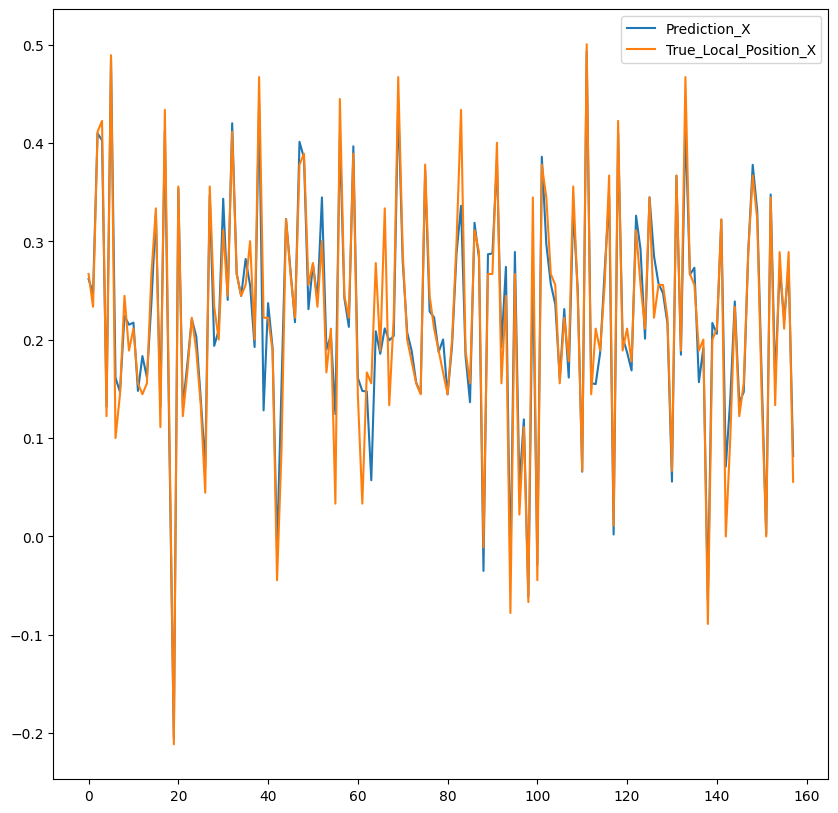

In [22]:
comparison_df = label_test.copy()
predictions = regressor.predict(feature_test.values)
predictions = predictions.transpose()
comparison_df["Prediction_X"] = predictions[0]
comparison_df["Prediction_Y"] = predictions[1]
comparison_df = comparison_df.reset_index(drop=True)
plt.figure()
# # comparison_df.max()
comparison_df.sample(frac=0.05).reset_index(drop=True)[['Prediction_X', 'True_Local_Position_X']].plot(figsize=(10, 10))